In [1]:
var openDigger = require('../src/open_digger');

var query = openDigger.driver.clickhouse.query;

2015-01: star数量:4996
2015-02: star数量:193
2015-03: star数量:232
2015-04: star数量:179
2015-05: star数量:249
2015-06: star数量:136
2015-07: star数量:250
2015-08: star数量:185
2015-09: star数量:269
2015-10: star数量:205
2015-11: star数量:373
2015-12: star数量:72
2016-01: star数量:312
2016-02: star数量:161
2016-03: star数量:128
2016-04: star数量:293
2016-05: star数量:215
2016-06: star数量:194
2016-07: star数量:268
2016-08: star数量:302
2016-09: star数量:58
2016-10: star数量:171
2016-11: star数量:230
2016-12: star数量:257
2017-01: star数量:17
2017-02: star数量:182
2017-03: star数量:321
2017-04: star数量:99
2017-05: star数量:301
2017-06: star数量:130
2017-07: star数量:298
2017-08: star数量:144
2017-09: star数量:158
2017-10: star数量:267
2017-11: star数量:271
2017-12: star数量:89
2018-01: star数量:572
2018-02: star数量:808
2018-03: star数量:769
2018-04: star数量:1003
2018-05: star数量:449
2018-06: star数量:508
2018-07: star数量:255
2018-08: star数量:154
2018-09: star数量:688
2018-10: star数量:303
2018-11: star数量:380
2018-12: star数量:417
2019-01: star数量:595
2019-02: star数量:458
201

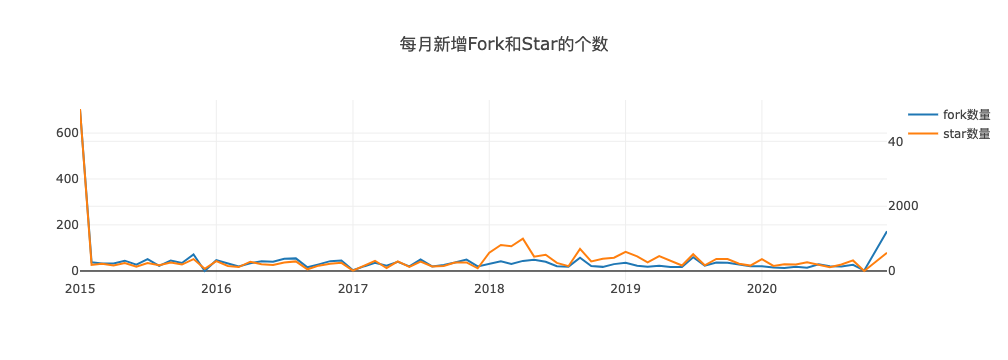

In [2]:
//这里是第一题
var years = [2015,2016,2017,2018,2019,2020];
var repo_id = 2579314;
Promise.all(
  years.map((year) => {
    return query(`
    SELECT created_date,repo_stargazers_count,repo_forks_count
    FROM github_log.year${year}
    WHERE repo_id=${repo_id} and type = 'PullRequestEvent'
    `);
  })
).then((data) => {
  const starData = {};
  const forkData = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      starData[data[i][j].created_date.slice(0, 7)] = Number(data[i][j].repo_stargazers_count);
      forkData[data[i][j].created_date.slice(0, 7)] = Number(data[i][j].repo_forks_count);
    }
  }
  const starDataOrder = Object.fromEntries(Object.entries(starData).sort());
  const forkDataOrder = Object.fromEntries(Object.entries(forkData).sort());
  let month = [],month2 =[],starNum = [],forkNum = [];
  let lastMonth = 0;  
  for (var key in starDataOrder){
      month.push(key);
      let thisMonth = starDataOrder[key];
      starNum.push(thisMonth-lastMonth);
      lastMonth = thisMonth;
  }
  lastMonth = 0;
  for (var key in forkDataOrder){
      month2.push(key);
      let thisMonth = forkDataOrder[key];
      forkNum.push(thisMonth-lastMonth);
      lastMonth = thisMonth;
  }
  for(var i=0;i<month.length;i++){
      console.log(month[i] + ":","star数量:" + starNum[i]);
  }
  for(var i=0;i<month2.length;i++){
      console.log(month2[i] + ":","fork数量:" + forkNum[i]);
  }
    
  openDigger.render.plotly([
                            {x: month2, y: forkNum, mode: 'scatter', name: 'fork数量'},
                            {x: month, y: starNum, mode: 'scatter', name: 'star数量', yaxis: 'y2'},
                           ], { title: "每月新增Fork和Star的个数" , 
                                yaxis2: { overlaying: 'y', side: 'right', anchor: 'x' },
                              });
});

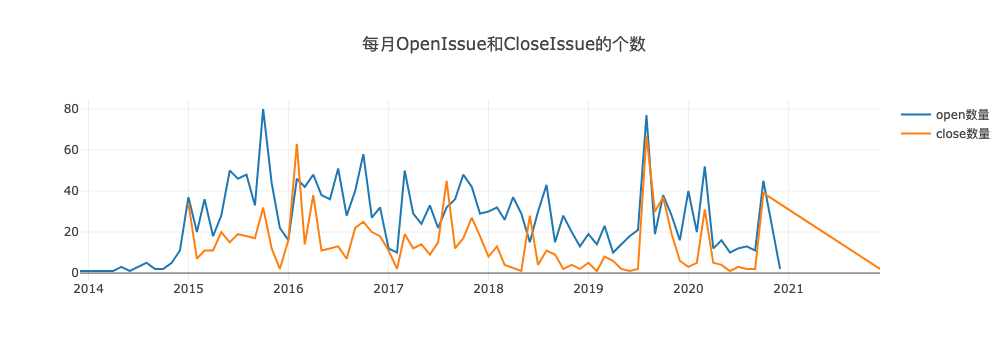

In [3]:
//这里是二题
var years = [2015,2016,2017,2018,2019,2020,2021];
var repo_id = 2579314;
Promise.all(
  years.map((year) => {
    return query(`
    select issue_created_at,issue_closed_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'PullRequestEvent'
    `);
  })
).then((data) => {
  //console.log(data);
  const issueOpenData = {};
  const issueCloseData = {};
  // let issumeAverageDuration = 0;
  for(let i = 0; i < data.length; i++) {
      for(let j = 0; j < data[i].length; j++) {
          data[i][j].issue_created_at = data[i][j].issue_created_at.slice(0, 7);
          data[i][j].issue_closed_at = data[i][j].issue_closed_at.slice(0, 7);
          if (issueOpenData.hasOwnProperty(data[i][j].issue_created_at)){
              issueOpenData[data[i][j].issue_created_at] = issueOpenData[data[i][j].issue_created_at]+1;
          }else{
              issueOpenData[data[i][j].issue_created_at] = 1;
          }
          
          if (issueCloseData.hasOwnProperty(data[i][j].issue_closed_at)){
              issueCloseData[data[i][j].issue_closed_at] = issueCloseData[data[i][j].issue_closed_at]+1;
          }else{
              issueCloseData[data[i][j].issue_closed_at] = 1;
          }
          
      }
  }
  const issueOpenDataOrder = Object.fromEntries(Object.entries(issueOpenData).sort());
  const issueCloseDataOrder = Object.fromEntries(Object.entries(issueCloseData).sort());

  let month = [],month2=[],openNum = [],closeNum = [];
  for (const key in issueOpenDataOrder) {
    month.push(key);
    openNum.push(issueOpenDataOrder[key]);
  }
  for (const key in issueCloseDataOrder) {
      if(key>'2015'){
          month2.push(key);
          closeNum.push(issueCloseDataOrder[key]);
      }
  }
    
  openDigger.render.plotly([
                            {x: month, y: openNum, mode: 'scatter', name: 'open数量'},
                            {x: month2, y: closeNum, mode: 'scatter', name: 'close数量'},
                           ], { title: "每月OpenIssue和CloseIssue的个数" , 
                                
                              });
});

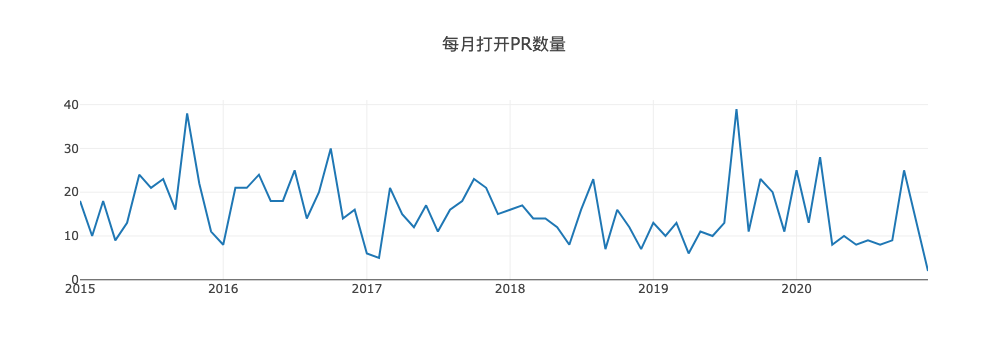

In [6]:
//这里是三题第一问
var years = [2015,2016,2017,2018,2019,2020,2021];
var repo_id = 2579314;
Promise.all(
  years.map((year) => {
    return query(`
    select created_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'PullRequestEvent' and action = 'opened'
    `);
  })
).then((data) => {
    const openData = {};
    for (let i = 0; i < data.length; i++) {
      for (let j = 0; j < data[i].length; j++) {
        if (openData.hasOwnProperty(data[i][j].created_at.slice(0, 7))) {
          openData[data[i][j].created_at.slice(0, 7)] += 1;
        } else {
          openData[data[i][j].created_at.slice(0, 7)] = 1;
        }
      }
    }
    const openDataOrder = Object.fromEntries(Object.entries(openData).sort());
    let month = [];
    let openNum = [];
    for (const key in openDataOrder) {
      month.push(key);
      openNum.push(openDataOrder[key]);
    }
    openDigger.render.plotly([
      {
        x: month,
        y: openNum,
        type: 'scatter'
      },
    ], {title: '每月打开PR数量'});
});

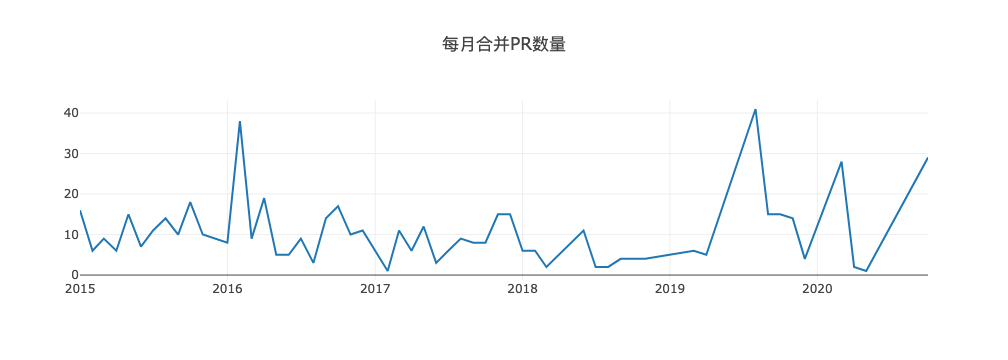

In [7]:
//这里是三题第二问
var years = [2015,2016,2017,2018,2019,2020,2021];
var repo_id = 2579314;
Promise.all(
  years.map((year) => {
    return query(`
    select pull_merged_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'PullRequestEvent'
    `);
  })
).then((data) => {
  const mergeData = {};
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
        if (mergeData.hasOwnProperty(data[i][j].pull_merged_at.slice(0, 7))) {
          mergeData[data[i][j].pull_merged_at.slice(0, 7)] += 1;
        } else {
          mergeData[data[i][j].pull_merged_at.slice(0, 7)] = 1;
        }
    }
  }
  const mergeDataOrder = Object.fromEntries(Object.entries(mergeData).sort());
  let month = [];
  let mergeNum = [];
  for (const key in mergeDataOrder) {
      if(key>'2015'){
        month.push(key);
        mergeNum.push(mergeDataOrder[key]);
      }
  }

  openDigger.render.plotly([
    {
      x: month,
      y: mergeNum,
      type: "scatter",
    },
  ], { title: "每月合并PR数量" });
});


In [ ]:
var openDigger = require('../src/open_digger');
var query = openDigger.driver.clickhouse.query;
var startYear = 2015,
  endYear = 2022;
var years = [];
var months = [];
var monthsIndex = [];
var repo_id = 2579314;
for (let y = startYear; y <= endYear; y++) years.push(y)
for (let i = 1; i < 13; i++) monthsIndex.push(i)
for (let y = startYear; y <= endYear; y++) //months.push(m);
    for (let m = 1; m < 13; m ++) {
        if (m < 10)
            months.push(y + '-0' + m)
        else months.push(y + '-' + m)
    }
Promise.all(
    //years.map((year) => {
        months.map((month) => {
        // //console.log(toMonth(${month}))
        // //return query (`select toMonth(now())`)
        // //months.forEach(item => {
        //     console.log(month)
             return query(`select distinct count(actor_id) as cnt from github_log.year${month.slice(0,4)} where repo_id = ${repo_id} and toString(created_at) like '${month}%' `)
        // })
        //return query(`select created_at from github_log.year${year} where repo_id = ${repo_id} and toString(created_at) like '2016-01%'`)
        //});
    })
).then(
    res=>{
        var data = {}
        //console.log(res);
        var cntArray = [];
        var timeArray = [];
        for (let i = 0;i < res.length;i ++) {
            cntArray.push(res[i][0].cnt)
        }
        for (let y = 2015;y < 2023; y ++){
            for (let m = 1;m < 13;m ++){
                if (m > 9)
                    timeArray.push(y+'-'+m)
                else timeArray.push(y+'-0'+m)
            }
            //console.log(res[i][0].cnt);
            //data[]
        }
        var data = [
            {
              x: timeArray,
              y: cntArray,
              type: 'scatter'
            },
        ];
        //console.log(timeArray)
        // console.log(cntArray)
        openDigger.render.plotly(data, {title: '每月活跃开发者'});
        var values = []
        values.push(monthsIndex)
        for (let i = 0;i < endYear - startYear + 1; i ++){
            let yearCnt = []
            for (let j = 1;j < 13; j ++){
                let index = i * 12 + j;
                yearCnt.push(cntArray[index])
            }
            values.push(yearCnt)
        }
            
        var data = [{
          type: 'table',
          header: {
            values: [["<b>Year</b>"], ["<b>2015</b>"],
                         ["<b>2016</b>"], ["<b>2017</b>"], ["<b>2018</b>"],["<b>2019</b>"],["<b>2020</b>"],["<b>2021</b>"],["<b>2022</b>"]],
            align: ["left", "center"],
            line: {width: 1, color: '#506784'},
            fill: {color: '#119DFF'},
            font: {family: "Arial", size: 12, color: "white"}
          },
          cells: {
            values: values,
            align: ["left", "center"],
            line: {color: "#506784", width: 1},
             fill: {color: ['#25FEFD', 'white']},
            font: {family: "Arial", size: 11, color: ["#506784"]}
          }
        }]
        //openDigger.render.plotly(data, {title: '每月活跃开发者'});
        
    }
)



In [ ]:
var startYear = 2015,
  endYear = 2022;
var years = [];
var repo_id = 2579314;
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
  years.map((year) => {
    return query(`
    select issue_id, issue_created_at, issue_closed_at
    from github_log.year${year}
    where repo_id=${repo_id}
    `);
  })
).then((data) => {
  let issueDurations = [];
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
      if (data[i][j].issue_closed_at.slice(0, 4) !== "1970") {
        const oneDay = 24 * 60 * 60 * 1000;
        var startTime = Date.parse(data[i][j].issue_created_at.slice(0, 10));
        var closeTime = Date.parse(data[i][j].issue_closed_at.slice(0, 10));
        const duration = Math.round(Math.abs((startTime - closeTime) / oneDay));
        issueDurations.push(duration);
      }
    }
  }
  issueDurations.sort();
  let mid = issueDurations[Math.floor(issueDurations.length / 2)];
  let average = issueDurations.reduce((a, b) => a + b, 0) / issueDurations.length;
  console.log('任务5');
  console.log(
    "Issue 从打开到关闭的平均时长为 " + average.toFixed(2) + "天"
  );
  console.log(
    "Issue 从打开到关闭的中位数为 " + mid + "天"
  );
});

In [ ]:
var startYear = 2015,
endYear = 2022;
var years = [];
var repo_id = 2579314;
var openDigger = require('../src/open_digger');
var query = openDigger.driver.clickhouse.query;
for (var y = startYear; y <= endYear; y++) years.push(y);
console.log('任务6');
var res = []
years.map((year) => {
    res.push(query(`
    select issue_id, created_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'PullRequestEvent' and action = 'opened'
    `));
})
years.map((year) => {
    res.push(query(`
    select issue_id, created_at, pull_merged_at
    from github_log.year${year}
    where repo_id=${repo_id} and type = 'PullRequestEvent' and action = 'closed'
    `));
})
Promise.all(
    res
).then((data) => {
    console.log(data.length)
    var createData = []
    var mergeData = []
    for (let i = 0;i < 8; i ++){
        createData.push(data[i])
    }
    for (let i = 8;i < 16; i ++){
        mergeData.push(data[i])
    }
    let prOpen = {};
    for(let i = 0; i < 8; i++) {
        for (let j = 0; j < createData[i].length; j ++) {
            if (createData[i][j].created_at.slice(0, 4) !== '1970') {
                prOpen[createData[i][j].issue_id] = createData[i][j].created_at;
            }
        }
    }
    let prMerge = {};
    for(let i = 0; i < 8; i++) {
        for (let j = 0; j < mergeData[i].length; j ++) {
            if (mergeData[i][j].pull_merged_at.slice(0, 4) !== '1970') {
                prMerge[mergeData[i][j].issue_id] = mergeData[i][j].pull_merged_at;
            }
        }
    }
    let PRdurations = [];
    for (let MergeId in prMerge) {
      for (let OpenId in prOpen) {
        if (MergeId === OpenId) {
          const oneDay = 24 * 60 * 60 * 1000;
          let openTime = Date.parse(prOpen[OpenId].slice(0, 10));
          let mergeTime = Date.parse(prMerge[MergeId].slice(0, 10));
          const duration = Math.round(
            Math.abs((mergeTime - openTime) / oneDay)
          );
          PRdurations.push(duration);
        }
      }
    }
    PRdurations.sort();
    let mid =
      PRdurations[Math.floor(PRdurations.length / 2)];
    let average =
      PRdurations.reduce((a, b) => a + b, 0) / PRdurations.length;
    console.log(
      "PR 从打开到合并的平均时长为 " + average.toFixed(2) + "天"
    );
    console.log(
      "PR 从打开到合并的中位数为 " + mid + "天"
    );
});


In [ ]:
var startYear = 2015,
  endYear = 2022;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(
  years.map((year) => {
    return query(`
    select issue_id, issue_author_id, issue_created_at, pull_review_comment_created_at
    from github_log.year2020
    where repo_id=${repo_id} and type='PullRequestReviewCommentEvent' and pull_review_comment_author_id<>issue_author_id
    `);
  })
).then((data) => {
  let prCommentInterval = [];
  for (let i = 0; i < data.length; i++) {
    for (let j = 0; j < data[i].length; j++) {
        const oneDay = 24 * 60 * 60 * 1000;
        var createTime = Date.parse(data[i][j].issue_created_at.slice(0, 10));
        var commentTime = Date.parse(data[i][j].pull_review_comment_created_at.slice(0, 10));
        const duration = Math.round(Math.abs((createTime - commentTime) / oneDay));
        prCommentInterval.push(duration);
    }
  }
  prCommentInterval.sort();
  let mid = prCommentInterval[Math.floor(prCommentInterval.length / 2)];
  let average = prCommentInterval.reduce((a, b) => a + b, 0) / prCommentInterval.length;
  console.log('任务7.2');
  console.log(
    "PR 从创建到第一次有人回复(非本人)的平均时长为 " + average.toFixed(2) + "天"
  );
  console.log(
    "PR 从创建到第一次有人回复(非本人)的中位数为 " + mid + "天"
  );
});

In [ ]:
#### 任务8 关键的时间节点
1. 项目起步阶段的2015年1月，新增issue和star数量非常多
2. 在2018年1月到4月，项目受到了井喷式的关注，新增了很多issue和star，此时的月活跃开发者数量也达到峰值
3. 在2019年8月，issue的打开、关闭量，以及PR打开、合并量达到峰值